
# Regresión lineal y árboles de decisión para tareas de regresión


## Objetivos

Mediante este proyecto se pretende que ponga en práctica los pasos para la resolución de un problema de machine learning, el tratamiento de datos y la creación de modelos basados en regresión lineal y árboles de decisión. El objetivo es comprender de forma práctica con un problema determinado las diferencias que existen a la hora de entrenar los diferentes modelos.

- Iniciarse en el Análisis Exploratorio de Datos (EDA) para los problemas de Machine Learning.
- Entender y aplicar los conceptos de la Regresión Lineal Múltiple a un problema de regresión.
- Entender y aplicar los conceptos de Árboles de Decisión a un problema de regresión.
- Evaluar y analizar los resultados de los clasificadores.
- Investigar la aplicación de los modelos de clasificación a problemas reales.


## Descripción de la actividad

Debes completar los espacios indicados en el notebook con el código solicitado y la respuesta, en función de lo que se solicite. Ten encuenta que las celdas vacías indican cuántas líneas debe ocupar la respuesta, por lo general no más de una línea.

El conjunto de datos con el que vamos a trabajar se encuentra en el siguiente enlace: https://archive.ics.uci.edu/dataset/360/air+quality

Se trata de un dataset con un conjunto de datos sobre calidad del aire. El conjunto de datos contiene 9358 instancias de respuestas promediadas por hora de una matriz de 5 sensores químicos de óxido de metal integrados en un dispositivo multisensor químico de calidad del aire. El dispositivo estaba ubicado en un área significativamente contaminada, al nivel de la carretera, dentro de una ciudad italiana. Los datos se registraron desde marzo de 2004 hasta febrero de 2005 (un año).

El objetivo de la regresión será predecir la calidad del aire para un determinado día.

### Tareas que se deben realizar

- Análisis descriptivo de los datos:
   - Debe completarse el código solicitado y responder a las preguntas. Todo ello en el notebook dado como base.
- Regresión:
  - Debe completarse el código solicitado y responder a las preguntas. Todo ello en el notebook dado como base.

### Análisis descriptivo de los datos
A continuación vas a encontrar una serie de preguntas que tendrás que responder. Para responder tendrás que escribir (y ejecutar) una (o más de una) línea de código, y a continuación indicar la respuesta en la celda indicada.

In [1]:
## cargar el dataset


import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib as mpl

filename = "./AirQualityUCI.csv"
df =  pd.read_csv(filename, sep=';')
df.head()


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [2]:
print(df.shape[0])


9471


In [3]:
 # Registros con todos los atributos vacios
print(df.dropna(thresh=1).shape[0])

9357


## ¿cuántas instancias tiene el dataset?
Número de registros: <b>9357</b> registros con valores informados (Existe algún atributo en el registro que este informado)
<hr>
<h1><b>¿cuál es el tipo de datos de cada una de las columnas?

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB
None

Se observa que los datos no tienen el formato correcto para que python los represente correctamente. Por este motivo se adaptan para poder hacerlo:

In [5]:

# Obtener todas las columnas que son de tipo objeto (Nos saltamos los dos primeros atributos ya que són correctos)
object_columns = df.iloc[:, 2:].select_dtypes(include=['object']).columns

# Reemplazar las comas por puntos y convertir a tipo float
for column in object_columns:
    df[column] = df[column].str.replace(',', '.').astype(float)
#Representación correcta de los datos
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB
None

<h1>Respuesta</h1>

En una primera instancia tenemos un total de 7 atributos definidos cómo Objeto y 8 cómo Float64, pero observando los registros nos podemos dar cuenta que esta tratando mal el las comas de los decimales en nuestros datos, por este motivo se tratan como objetos en lugar de float64.

Para dar un tratamiento correcto a nuestros datos se adapta estos atributos para que se puedan tratar correctamente, sustituyendo las  comas (",") por puntos (".") Con el siguiente commando, se realiza el ajusto del tipo a partir de la segunda columna para solucionar esta casuística de nuestros datos:

<br><b>
object_columns = df.iloc[:, 2:].select_dtypes(include=['object']).columns

#Reemplazar las comas por puntos y convertir a tipo float

for column in object_columns:

    df[column] = df[column].str.replace(',', '.').astype(float)
</br></b>

De esta forma tenemos que los tipos de los datos son <b> 13 de tipo float y 2 de tipo objecto (Fecha y hora)</b>
<hr>
<h1><b>¿cuántas columnas categóricas hay? ¿y cuántas continuas?

Según el informe del origen del dataset tenemos que las siguiente columnas són categóricas:
<ul>
    <li>Time	
    <li>PT08.S1(CO)
    <li>PT08.S2(NMHC)
    <li>PT08.S3(NOx)
    <li>PT08.S4(NO2)
    <li>PT08.S5(O3)
</ul>

In [6]:
df['Time'].value_counts() #Realmente categoricas
df['PT08.S1(CO)'].value_counts()
df['PT08.S2(NMHC)'].value_counts()
df['PT08.S3(NOx)'].value_counts()
df['PT08.S4(NO2)'].value_counts()
df['PT08.S5(O3)'].value_counts()

PT08.S5(O3)
-200.0     366
 836.0      20
 825.0      20
 826.0      19
 926.0      18
          ... 
 339.0       1
 333.0       1
 2152.0      1
 2165.0      1
 374.0       1
Name: count, Length: 1744, dtype: int64

In [7]:
# Iterar sobre cada columna del DataFrame
for columna in df.columns:
    # Obtener los diferentes valores únicos de la columna
    valores_unicos = df[columna].unique()
    # Imprimir los valores únicos de la columna
    print(f"Valores únicos en la columna \n'{columna}': {valores_unicos}")

Valores únicos en la columna 
'Date': ['10/03/2004' '11/03/2004' '12/03/2004' '13/03/2004' '14/03/2004'
 '15/03/2004' '16/03/2004' '17/03/2004' '18/03/2004' '19/03/2004'
 '20/03/2004' '21/03/2004' '22/03/2004' '23/03/2004' '24/03/2004'
 '25/03/2004' '26/03/2004' '27/03/2004' '28/03/2004' '29/03/2004'
 '30/03/2004' '31/03/2004' '01/04/2004' '02/04/2004' '03/04/2004'
 '04/04/2004' '05/04/2004' '06/04/2004' '07/04/2004' '08/04/2004'
 '09/04/2004' '10/04/2004' '11/04/2004' '12/04/2004' '13/04/2004'
 '14/04/2004' '15/04/2004' '16/04/2004' '17/04/2004' '18/04/2004'
 '19/04/2004' '20/04/2004' '21/04/2004' '22/04/2004' '23/04/2004'
 '24/04/2004' '25/04/2004' '26/04/2004' '27/04/2004' '28/04/2004'
 '29/04/2004' '30/04/2004' '01/05/2004' '02/05/2004' '03/05/2004'
 '04/05/2004' '05/05/2004' '06/05/2004' '07/05/2004' '08/05/2004'
 '09/05/2004' '10/05/2004' '11/05/2004' '12/05/2004' '13/05/2004'
 '14/05/2004' '15/05/2004' '16/05/2004' '17/05/2004' '18/05/2004'
 '19/05/2004' '20/05/2004' '21/05/2004

De las columnas Date y Time solo deseamos para el análisis el dia, el mes, la temporada y la hora de los datos por esto motivo se añade dos columnas con estos datos y más adelante se eliminara las no deseadas

In [8]:
# Convertir 'Date' a formato de fecha español (DD/MM/AAAA)
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Extraer el mes de la columna 'Date' y convertir a entero
df['Month'] = df['Date'].dt.month.astype('Int64')

# Crear una columna 'Hour' extrayendo la hora de 'Time' y convertir a entero
df['Hour'] = pd.to_datetime(df['Time'], format='%H.%M.%S').dt.hour.astype('Int64')

# Crear una columna 'Year' extrayendo el año de 'Date' y convertir a entero
df['Day'] = df['Date'].dt.day.astype('Int64')

def get_season(month):
    if pd.isnull(month):
        return  np.nan
    if month in [3, 4, 5]:
        return 1
    elif month in [6, 7, 8]:
        return 2
    elif month in [9, 10, 11]:
        return 3
    else:
        return 4

# Suponiendo que ya has convertido 'Date' a formato de fecha español y has creado las columnas 'Month' y 'Hour'
# Creamos la columna 'Session' usando la función get_season
df['Season'] = df['Month'].apply(get_season).astype('Int64')

df.drop('Date', axis=1, inplace=True)
df.drop('Time', axis=1, inplace=True)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         9357 non-null   float64
 1   PT08.S1(CO)    9357 non-null   float64
 2   NMHC(GT)       9357 non-null   float64
 3   C6H6(GT)       9357 non-null   float64
 4   PT08.S2(NMHC)  9357 non-null   float64
 5   NOx(GT)        9357 non-null   float64
 6   PT08.S3(NOx)   9357 non-null   float64
 7   NO2(GT)        9357 non-null   float64
 8   PT08.S4(NO2)   9357 non-null   float64
 9   PT08.S5(O3)    9357 non-null   float64
 10  T              9357 non-null   float64
 11  RH             9357 non-null   float64
 12  AH             9357 non-null   float64
 13  Unnamed: 15    0 non-null      float64
 14  Unnamed: 16    0 non-null      float64
 15  Month          9357 non-null   Int64  
 16  Hour           9357 non-null   Int64  
 17  Day            9357 non-null   Int64  
 18  Season  

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16,Month,Hour,Day,Season
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN,3,18,10,1
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN,3,19,10,1
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN,3,20,10,1
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN,3,21,10,1
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN,3,22,10,1


<h1>Respuesta</h1>
A simple vista podríamos decir que tenemos la siguiente distribución de columnas según el resultado del punto anterior:
<ul>
    <li>Hay 5 columnas categóricas (Year, Month, Hour, Day, Season).</li>
    <li>Hay 13 columnas continuas (PT08.S1(CO), NMHC(GT), C6H6(GT), PT08.S2(NMHC), NOx(GT), PT08.S3(NOx), NO2(GT), PT08.S4(NO2), PT08.S5(O3), T, RH, AH).</li>
</ul>
<hr>
<h1><b>¿existen valores nulos en el dataset?

In [9]:
df.isnull().sum()

CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
Month             114
Hour              114
Day               114
Season            114
dtype: int64

In [10]:
#Eliminamos registros vacios
df = df.dropna(thresh=1)
#Se observn dos columnas con 0 registros, las eliminamos
df = df.drop(['Unnamed: 15', 'Unnamed: 16'], axis=1)
df.isnull().sum()

CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
Month            0
Hour             0
Day              0
Season           0
dtype: int64

<h1>Respuesta</h1>
Si, existen regsitros en los cuales todos sus registros estan vacios. Tambien se elimina dos columnas unnamed detectados por el interprete que no contienen ningún dato.
<hr>
<h1><b>¿cuál es la variable respuesta?¿de qué tipo es?</h1>

In [11]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Month,Hour,Day,Season
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.0,9357.0,9357.0,9357.0
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604,6.310356,11.498557,15.876884,2.395319
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670,3.43816,6.923182,8.808653,1.140359
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,1.0,0.0,1.0,1.0
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300,3.0,5.0,8.0,1.0
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800,6.0,11.0,16.0,2.0
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200,9.0,18.0,23.0,3.0
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,12.0,23.0,31.0,4.0


<h1>Respuesta</h1>
Se selecciona como varaible respuesta el atributo  <b>CO(GT)</b>. <b>Es de tipo Continuo</b>
<hr>
<h1><b>¿Cómo es la distribución de las varaibles, CO,NOx y NO2?</h1>

Antes de analizar los datos, primero se transforma los datos definidos en la fuente del Dataset como faltantes, que vienen definidos como -200 y los sustituiremos como nulos para poder analizar mejor nuestros datos. Más adelante trataremos con ellos :

In [12]:
# Reemplazar -200 por NaN en todo el DataFrame
df.replace(-200, np.nan, inplace=True)

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


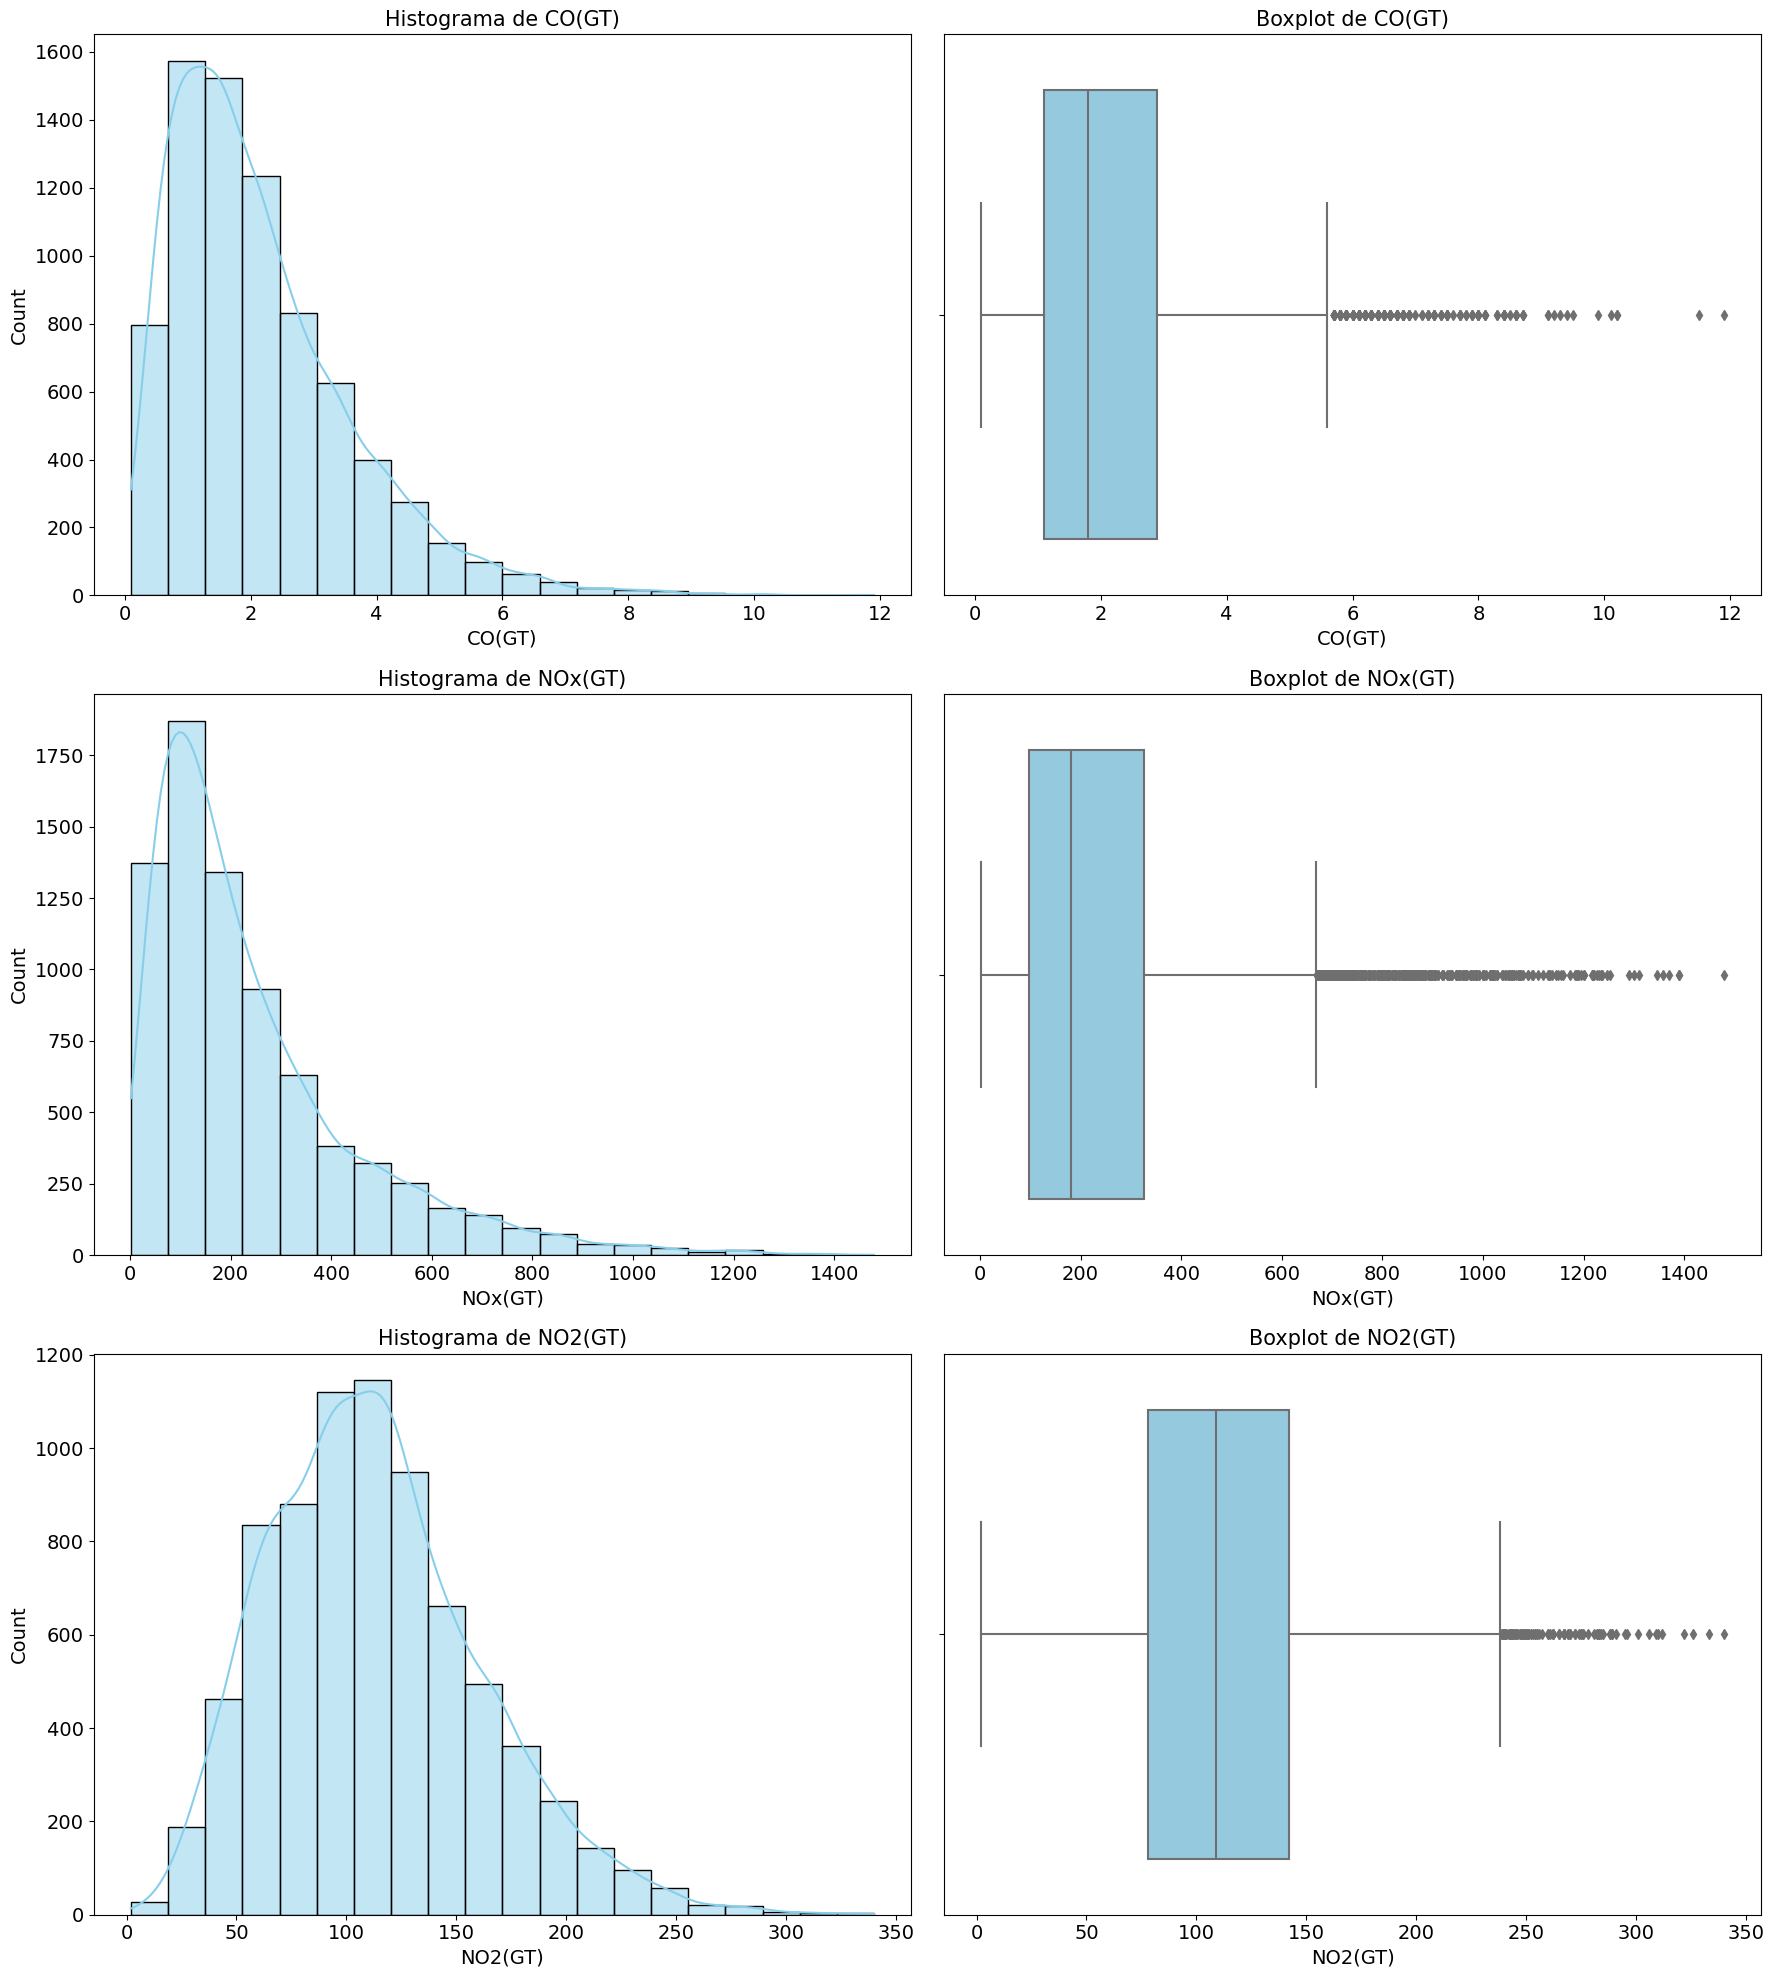

In [13]:
# Preparamos una figura de m x n
mpl.rc('font', size=14)
mpl.rc('axes', titlesize=15)
figure, axes = plt.subplots(nrows=3, ncols=2) # M 3rows 2columns
figure.set_size_inches(18, 20) # Tamaño total de la figura

# Columnas para el histograma
columns_for_histogram = ['CO(GT)', 'NOx(GT)', 'NO2(GT)']

for row, column in enumerate(columns_for_histogram):
    sns.histplot(df[column], ax=axes[row, 0], kde=True, bins=20, color='skyblue')
    axes[row, 0].set(title=f'Histograma de {column}')
    axes[row, 0].set_xlabel(column)

    sns.boxplot(x=df[column], ax=axes[row, 1], color='skyblue')
    axes[row, 1].set(title=f'Boxplot de {column}')
    axes[row, 1].set_xlabel(column)

# Ajustamos automáticamente la disposición de las subtramas
plt.tight_layout()

plt.show()


In [14]:
df.loc[:, ['CO(GT)', 'NOx(GT)', 'NO2(GT)']].describe()

,CO(GT),NOx(GT),NO2(GT)
count,7674.000000,7718.000000,7715.000000
mean,2.152750,246.896735,113.091251
std,1.453252,212.979168,48.370108
min,0.100000,2.000000,2.000000
25%,1.100000,98.000000,78.000000
50%,1.800000,180.000000,109.000000
75%,2.900000,326.000000,142.000000
max,11.900000,1479.000000,340.000000


<h1>Respuesta</h1>
<p>Podemos hacer algunas inferencias de los datos observando los histogramas:</p>
<ul>
  <li>CO y NOx tienen una distribución sesgada hacia la derecha, lo que indica que los valores altos tienen una baja frecuencia. Esto se puede observar tanto en las gráficas cómo en la descripción de las columnas dado que la distancia entre los cuartiles es cercana entre ellos y el valor máximo es mucho mayor. En el caso de las gráficas se puede observar que si ignoramos los valores anómalos estas datos se agrupan a la izquierda.</li>
  <li>En NO2, si eliminamos los valores anómalos, se observa una distribución normal (gaussiana), lo que sugiere que los datos están centrados en la media. Pero si contamos con estos datos anómalos comparte el mismo comportamiento que las otras variables y tiene una distribución sesgada hacia la derecha.</li>
</ul>
<hr>


<h1>¿Estas variables muestran alguna distribución especial?¿Tienen datos faltantes?¿y datos anómalos?</hq1>


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

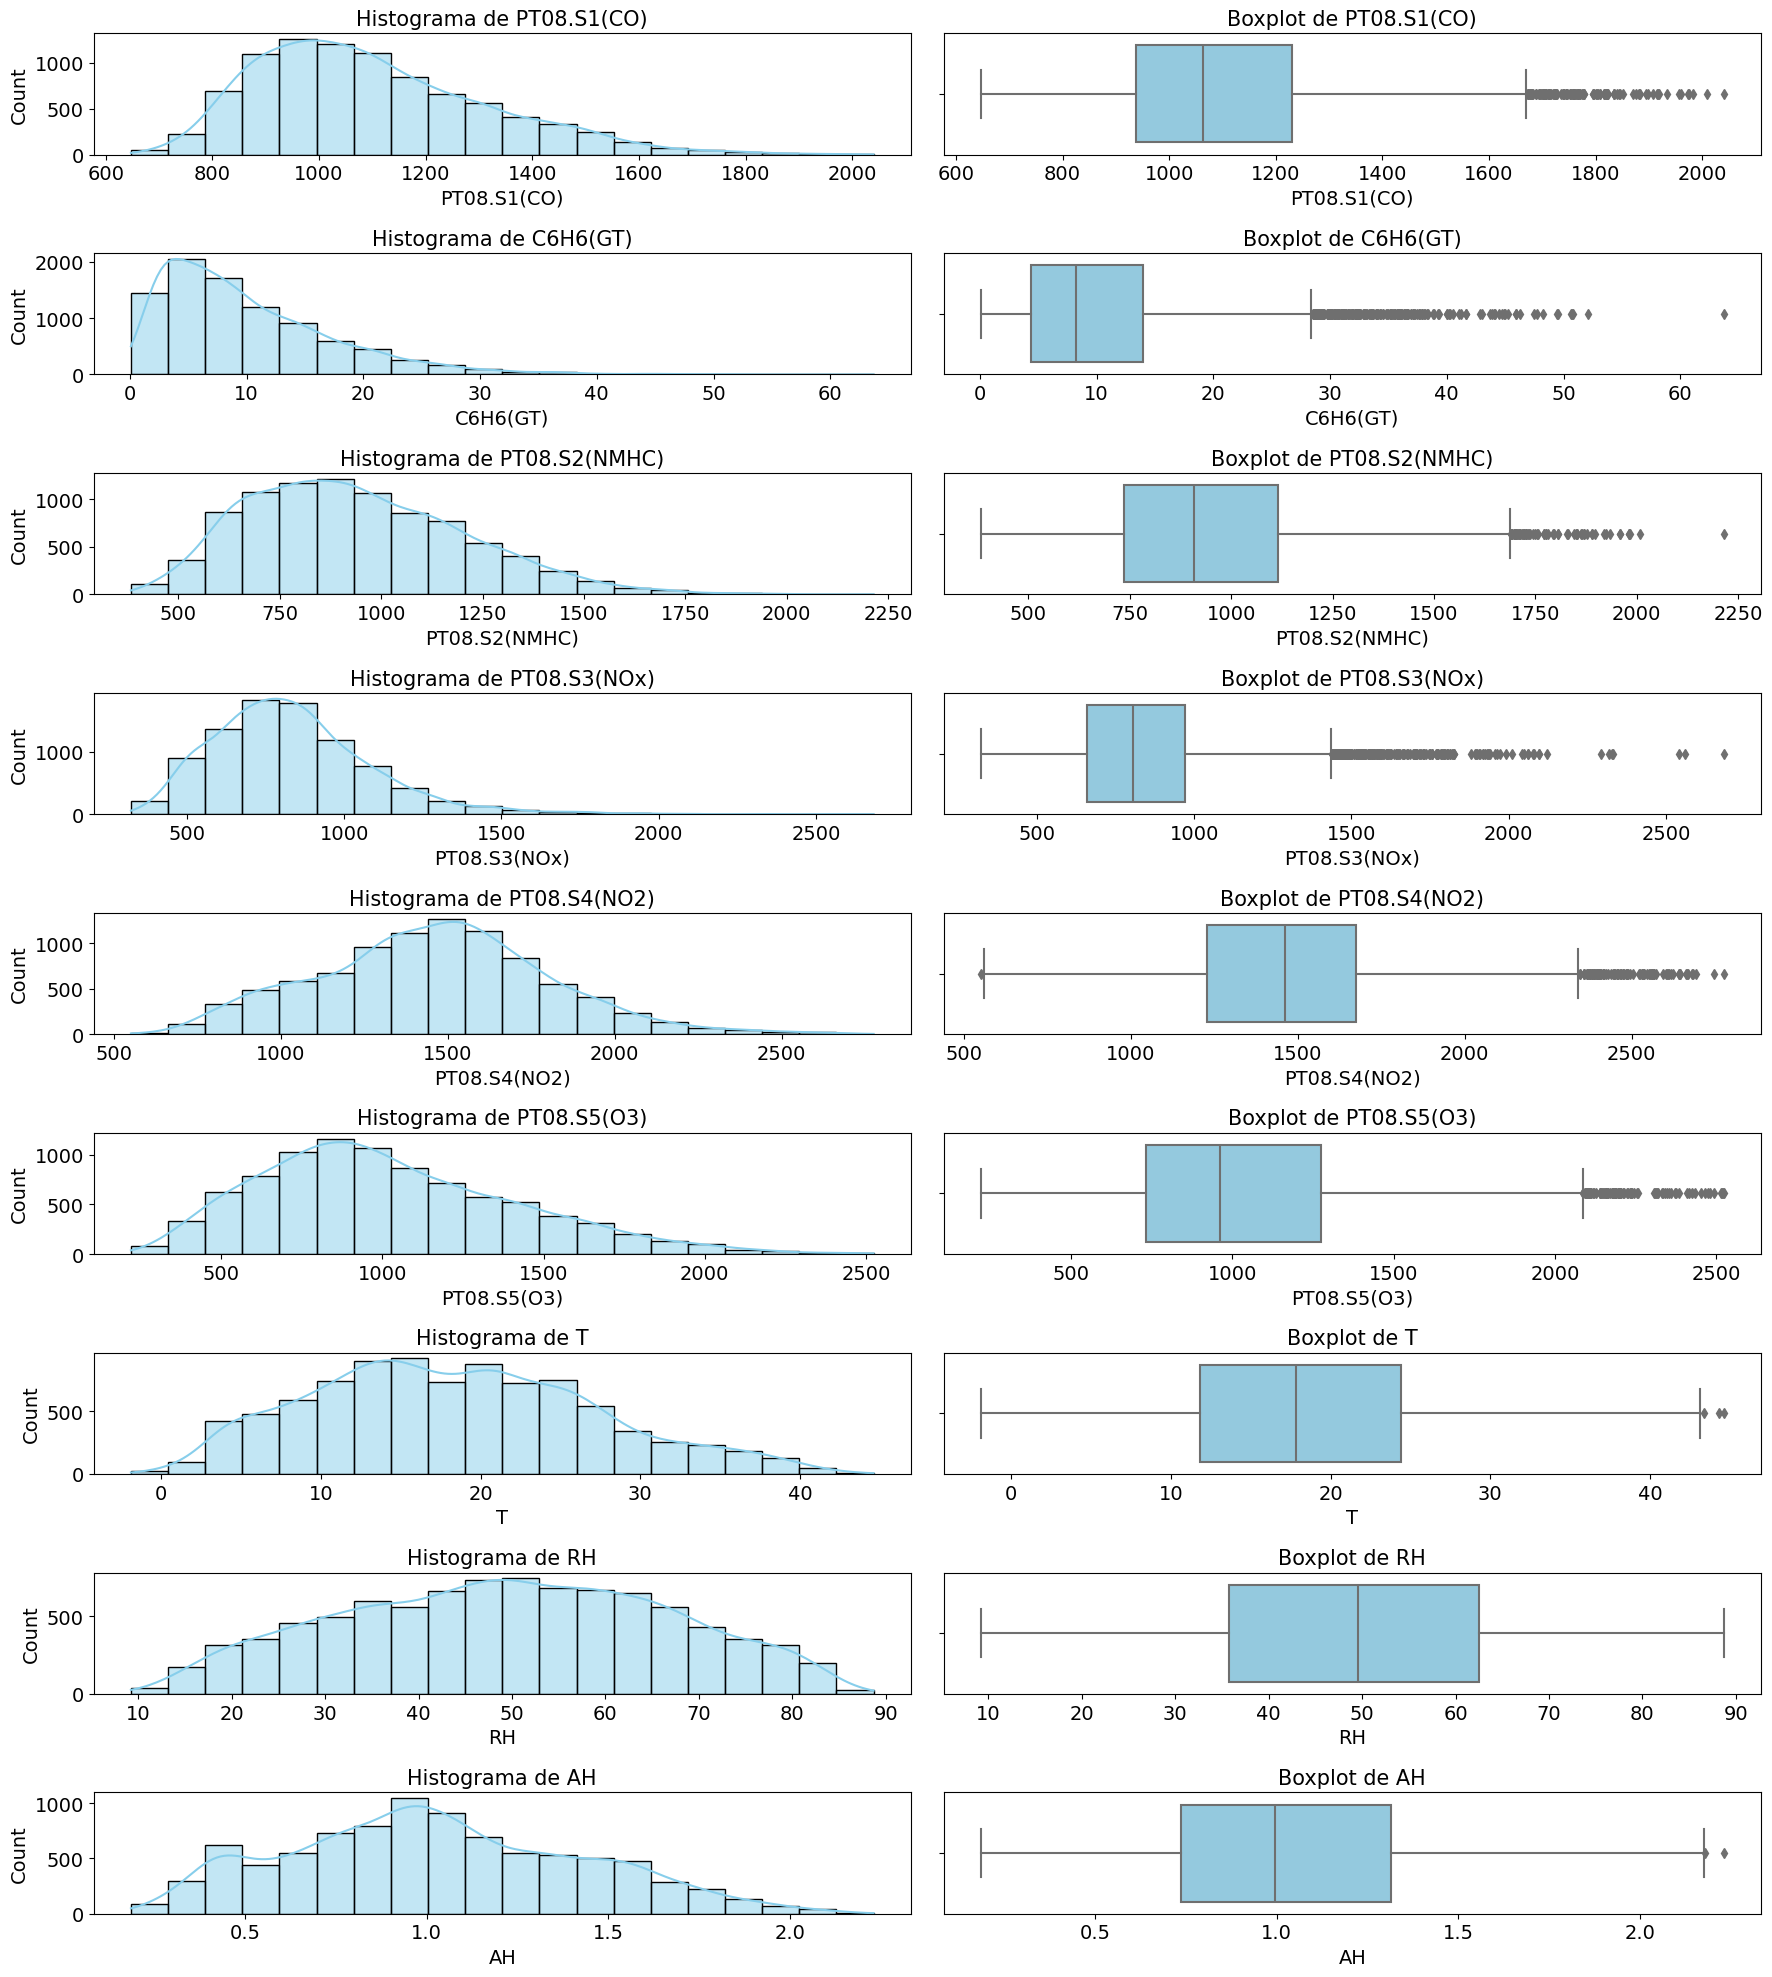

In [15]:

# Preparamos una figura de m x n
mpl.rc('font', size=14)
mpl.rc('axes', titlesize=15)
figure, axes = plt.subplots(nrows=9, ncols=2) # M 3rows 2columns
figure.set_size_inches(18, 20) # Tamaño total de la figura

# Columnas para el histograma
columns_for_histogram = ['PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']

for row, column in enumerate(columns_for_histogram):
    sns.histplot(df[column], ax=axes[row, 0], kde=True, bins=20, color='skyblue')
    axes[row, 0].set(title=f'Histograma de {column}')
    axes[row, 0].set_xlabel(column)

    sns.boxplot(x=df[column], ax=axes[row, 1], color='skyblue')
    axes[row, 1].set(title=f'Boxplot de {column}')
    axes[row, 1].set_xlabel(column)

# Ajustamos automáticamente la disposición de las subtramas
plt.tight_layout()

plt.show()


Podemos agrupar el comportamiento de nuestros datos en dos grupos:
<ul>
  <li>Columnas con distribución normal (Gaussiana):PT08.S3(NOx),  PT08.S4(NO2)	, T, RH, AH
  <li>Columnas con desviación a la derecha:CO(GT), NOx(GT), PT08.S1(CO),C6H6(GT), PT08.S2(NMHC), NO2(GT),PT08.S5(O3)
</ul>



<h2>Tratamiento registros no informados</h2>
Existen registros en los cuales todos sus registros están vacíos, una vez eliminado se observa que que no existen más registros con valores vacíos en alguno de sus atributos. 

También se elimina dos columnas unnamed detectados por el interprete que no contienen ningún dato.


Según la fuente de los datos, <b>los atributos no informados por los sensores tienen el valor -200</b>, para analizar mejor estos valores los substituiremos por NaN.

In [16]:
(df.isnull().sum())/len(df)

CO(GT)           0.179865
PT08.S1(CO)      0.039115
NMHC(GT)         0.902319
C6H6(GT)         0.039115
PT08.S2(NMHC)    0.039115
NOx(GT)          0.175163
PT08.S3(NOx)     0.039115
NO2(GT)          0.175484
PT08.S4(NO2)     0.039115
PT08.S5(O3)      0.039115
T                0.039115
RH               0.039115
AH               0.039115
Month            0.000000
Hour             0.000000
Day              0.000000
Season           0.000000
dtype: float64

In [17]:
#El atributo NMHC(GT) tiene no informados el 90,23% de los registros por este motivo se elimina su columna para el analisis y para las columnas con datos vacios por debajo del 5% tambien seran eliminados.
df.drop('NMHC(GT)', axis=1, inplace=True)
df.describe()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Month,Hour,Day,Season
count,7674.000000,8991.000000,8991.000000,8991.000000,7718.000000,8991.000000,7715.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,9357.0,9357.0,9357.0,9357.0
mean,2.152750,1099.833166,10.083105,939.153376,246.896735,835.493605,113.091251,1456.264598,1022.906128,18.317829,49.234201,1.025530,6.310356,11.498557,15.876884,2.395319
std,1.453252,217.080037,7.449820,266.831429,212.979168,256.817320,48.370108,346.206794,398.484288,8.832116,17.316892,0.403813,3.43816,6.923182,8.808653,1.140359
min,0.100000,647.000000,0.100000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700,1.0,0.0,1.0,1.0
25%,1.100000,937.000000,4.400000,734.500000,98.000000,658.000000,78.000000,1227.000000,731.500000,11.800000,35.800000,0.736800,3.0,5.0,8.0,1.0
50%,1.800000,1063.000000,8.200000,909.000000,180.000000,806.000000,109.000000,1463.000000,963.000000,17.800000,49.600000,0.995400,6.0,11.0,16.0,2.0
75%,2.900000,1231.000000,14.000000,1116.000000,326.000000,969.500000,142.000000,1674.000000,1273.500000,24.400000,62.500000,1.313700,9.0,18.0,23.0,3.0
max,11.900000,2040.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,12.0,23.0,31.0,4.0


Nota: A modo de experimento dado que a nivel personal no tengo experiencia en cuanto cual serai la mejor decisión a la hora de eliminar los datos faltantes, he realizado un análisis de estas opciones para ver cual genera mejores predicciones y he dejado solo la mejor opción para el resto del EDA, que se trata la opción de eliminar cualquier registro con Nulos, aunque yo pensara que la mejor opción era la tercera de esta lista:
-   <b>Se elimina cualquier registro que contenga un valor nulo</b>
-   Se sustituye los valores faltantes por la media y mediana según su distribución
-   Se sustituye por la media y la mediana agrupando por Season y Hora, según la distribución de cada columna.

In [18]:
df = df.dropna()

In [19]:
print(df.shape)
(df.isnull().sum())/len(df)

(6941, 16)


CO(GT)           0.0
PT08.S1(CO)      0.0
C6H6(GT)         0.0
PT08.S2(NMHC)    0.0
NOx(GT)          0.0
PT08.S3(NOx)     0.0
NO2(GT)          0.0
PT08.S4(NO2)     0.0
PT08.S5(O3)      0.0
T                0.0
RH               0.0
AH               0.0
Month            0.0
Hour             0.0
Day              0.0
Season           0.0
dtype: float64


<h3>Datos anómalos</h3>
Cómo se observan en los gráficos de cajas tenemos datos atípicos representados con los puntos que sobrepasan los limites. Estos datos no los vamos a eliminar dado que generaría un sobreajuste en los datos y podría generar sesgos en nuestros datos.

Los datos que si eliminaremos son aquellos registros con datos con valores atípicos extremos que son aquellos que sobrepasan el valor de 3 veces el valor de RIC.

In [20]:
def eliminar_atipicos_extremo(df):
    for columna in df.select_dtypes(include=[np.number]):
        # Calcular el primer y tercer cuartil
        q1 = df[columna].quantile(0.25)
        q3 = df[columna].quantile(0.75)
        
        # Calcular el Rango Intercuartílico (RIC)
        ric = q3 - q1
        
        # Calcular el límite superior e inferior para identificar valores atípicos
        limite_superior = q3 + 3 * ric
        limite_inferior = q1 - 3 * ric
        
        # Filtrar los datos para eliminar los valores atípicos
        df = df[(df[columna] >= limite_inferior) & (df[columna] <= limite_superior)]
    
    return df

# Llamar a la función para eliminar valores atípicos en todo el DataFrame
df = eliminar_atipicos_extremo(df)
df.describe()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Month,Hour,Day,Season
count,6849.000000,6849.000000,6849.000000,6849.000000,6849.000000,6849.000000,6849.000000,6849.000000,6849.000000,6849.000000,6849.000000,6849.000000,6849.0,6849.0,6849.0,6849.0
mean,2.139276,1115.519200,10.342386,953.047744,242.967733,816.298000,113.074901,1449.013871,1049.266754,17.831129,48.731625,0.986923,5.982479,11.994452,15.998248,2.35465
std,1.349150,211.820957,7.023587,254.669619,191.973857,238.067978,46.401735,348.594503,393.588807,8.862331,17.428391,0.401422,3.463214,6.824932,8.715436,1.17407
min,0.100000,667.000000,0.200000,390.000000,2.000000,330.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700,1.0,0.0,1.0,1.0
25%,1.100000,956.000000,4.900000,760.000000,103.000000,647.000000,79.000000,1207.000000,759.000000,11.300000,35.100000,0.695900,3.0,7.0,9.0,1.0
50%,1.900000,1084.000000,8.700000,929.000000,184.000000,787.000000,110.000000,1455.000000,1003.000000,17.000000,49.000000,0.956000,6.0,12.0,16.0,2.0
75%,2.900000,1250.000000,14.400000,1129.000000,327.000000,947.000000,141.000000,1680.000000,1311.000000,23.800000,62.100000,1.254700,9.0,18.0,24.0,3.0
max,8.100000,2040.000000,42.800000,1829.000000,1014.000000,1826.000000,322.000000,2746.000000,2519.000000,44.600000,88.700000,2.180600,12.0,23.0,31.0,4.0


<h1>¿cómo son las correlaciones entre las variables del dataset?

                 CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)   NOx(GT)  \
CO(GT)         1.000000     0.872454  0.927749       0.914370  0.763512   
PT08.S1(CO)    0.872454     1.000000  0.873004       0.878766  0.687479   
C6H6(GT)       0.927749     0.873004  1.000000       0.985100  0.688754   
PT08.S2(NMHC)  0.914370     0.878766  0.985100       1.000000  0.684165   
NOx(GT)        0.763512     0.687479  0.688754       0.684165  1.000000   
PT08.S3(NOx)  -0.721330    -0.773398 -0.745180      -0.794660 -0.686991   
NO2(GT)        0.666759     0.611934  0.588431       0.617228  0.751713   
PT08.S4(NO2)   0.620072     0.663781  0.762304       0.769341  0.193102   
PT08.S5(O3)    0.849284     0.890962  0.855290       0.868681  0.777127   
T              0.033449     0.038226  0.216205       0.248587 -0.278361   
RH             0.042348     0.156705 -0.048477      -0.067923  0.222482   
AH             0.057340     0.150147  0.194847       0.210022 -0.154611   
Month          0.093204  

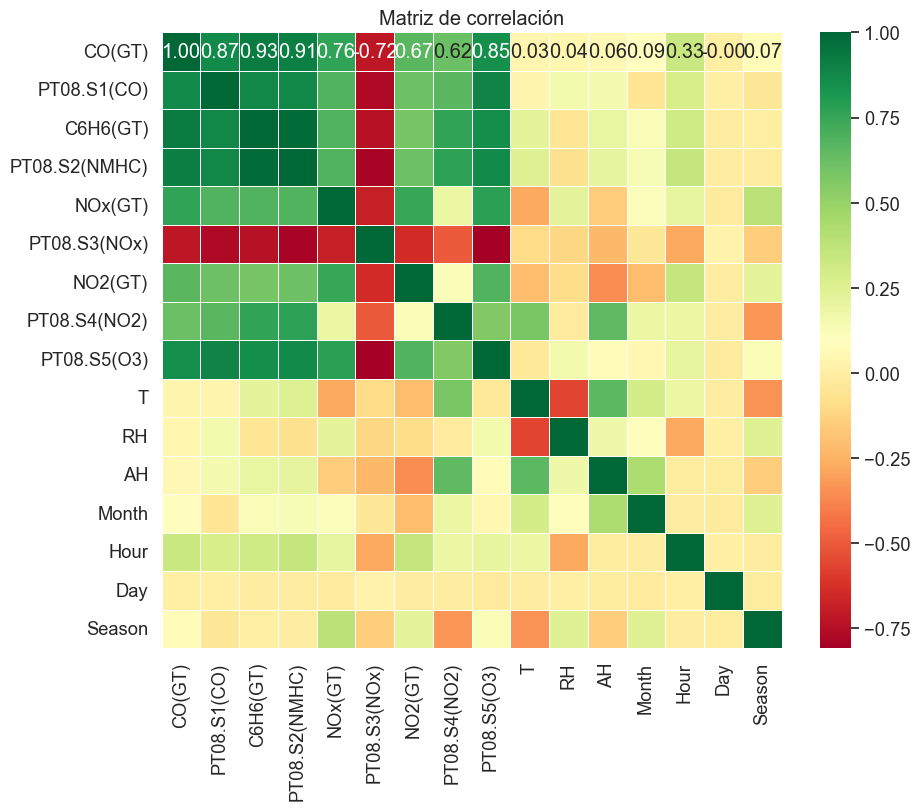

In [21]:

# Comprobamos las estadisticas de los datos canidadtos como variable respuesta
sns.reset_orig()
# Calcular la matriz de correlación
correlation_matrix = df.corr()

print(correlation_matrix)
# Obtener las estadísticas resumidas de las columnas seleccionadas
summary_stats = df.describe()

# Imprimir las estadísticas resumidas
print(summary_stats)
# Ajustar el tamaño de la fuente
sns.set(font_scale=1.2)

# Ajustar el tamaño de la figura
plt.figure(figsize=(10, 8))

# Crear el mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap="RdYlGn", fmt=".2f", linewidths=0.5)

# Añadir título
plt.title('Matriz de correlación')

# Mostrar el mapa de calor
plt.show()


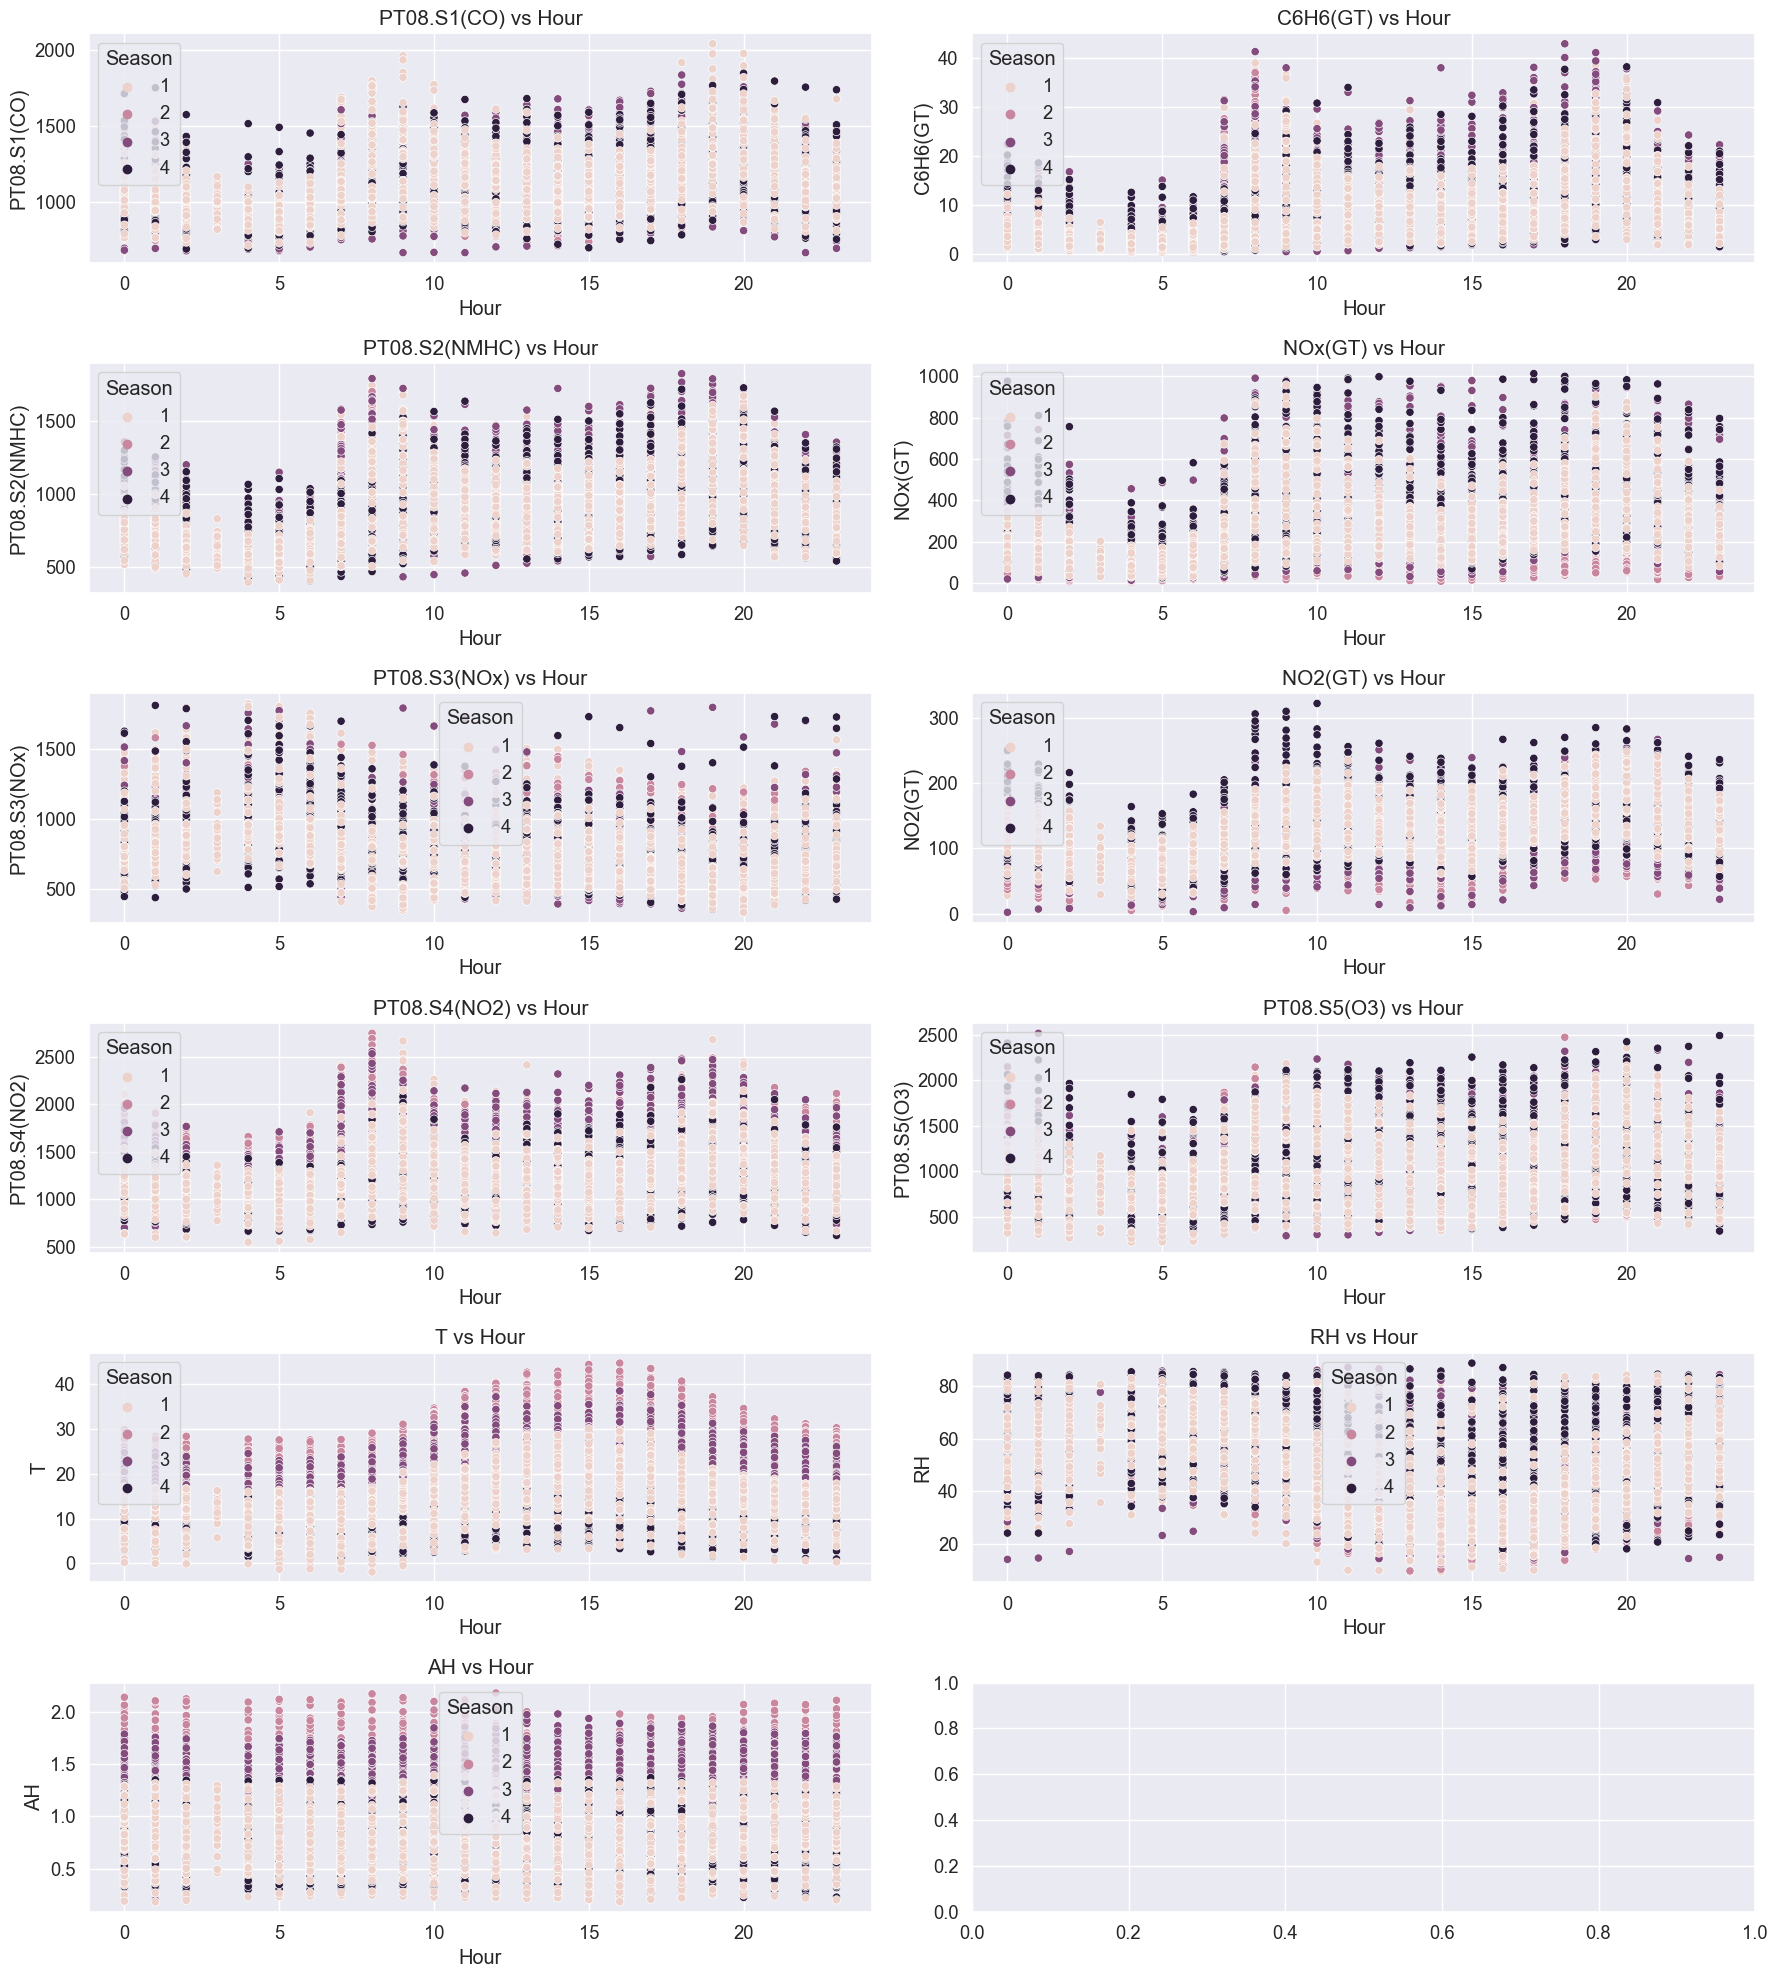

In [22]:
mpl.rc('font', size=14)
mpl.rc('axes', titlesize=15)
figure, axes = plt.subplots(nrows=6, ncols=2) 
figure.set_size_inches(18, 20)

# Columnas para la comparación
columns_to_compare = ['PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 
                      'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']

for i, column in enumerate(columns_to_compare):
    row = i // 2
    col = i % 2
    sns.scatterplot(x='Hour', y=column, hue='Season', data=df, ax=axes[row, col])
    axes[row, col].set(title=f'{column} vs Hour')
    axes[row, col].set_xlabel('Hour')
    axes[row, col].set_ylabel(column)

# Ajustamos automáticamente la disposición de las subtramas
plt.tight_layout()

plt.show()

<h2>Respuesta</h2>
<ul>
  <li>Hay una correlación significativa entre los resultados de los sensores, tanto en términos de concentración como de respuestas, a excepción del sensor PT08.S3(NOx), el cual muestra una correlación negativa notable con los demás sensores.</li>
  <li>Aunque la matriz de correlación no revela una relación sólida entre las características atmosféricas y el tiempo, las gráficas de dispersión revelan patrones estacionarios en los atributos de concentración de partículas y respuestas de los senores. Esto sugiere una correlación entre los atributos atmosféricos y temporales con los sensores.</li>
</ul>
<hr>
<h1>¿qué tres variables son las más correlacionadas con la variable objetivo?

In [23]:
# Calcular las correlaciones
correlations = df.corr()['CO(GT)'].sort_values(ascending=False)

# Imprimir las correlaciones
print(correlations)

CO(GT)           1.000000
C6H6(GT)         0.927749
PT08.S2(NMHC)    0.914370
PT08.S1(CO)      0.872454
PT08.S5(O3)      0.849284
NOx(GT)          0.763512
NO2(GT)          0.666759
PT08.S4(NO2)     0.620072
Hour             0.333291
Month            0.093204
Season           0.070064
AH               0.057340
RH               0.042348
T                0.033449
Day             -0.001465
PT08.S3(NOx)    -0.721330
Name: CO(GT), dtype: float64


Los tres atributos más correlacionados són: <b>C6H6(GT) con 0.854333, PT08.S2(NMHC) con 0.846144 y PT08.S1(CO) con 0.816440
<hr>
<h1>¿existe alguna variable que no tenga correlación?

Si existen estos tres atributos que tienen una correlación inferior al 5% de la variable objetivo:<b>
AH con 0.012846,
Day con -0.012197 y
T con -0.026848

En el caso de Month y Season cómo presentan información parecida y Season esta más correlacionada se elimina solamente la columna Month.

In [24]:
columnas_eliminar = ["T", "AH", "Month", "Day"]

# Eliminar las columnas del DataFrame
df = df.drop(columns=columnas_eliminar)

df.describe()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),RH,Hour,Season
count,6849.000000,6849.000000,6849.000000,6849.000000,6849.000000,6849.000000,6849.000000,6849.000000,6849.000000,6849.000000,6849.0,6849.0
mean,2.139276,1115.519200,10.342386,953.047744,242.967733,816.298000,113.074901,1449.013871,1049.266754,48.731625,11.994452,2.35465
std,1.349150,211.820957,7.023587,254.669619,191.973857,238.067978,46.401735,348.594503,393.588807,17.428391,6.824932,1.17407
min,0.100000,667.000000,0.200000,390.000000,2.000000,330.000000,2.000000,551.000000,221.000000,9.200000,0.0,1.0
25%,1.100000,956.000000,4.900000,760.000000,103.000000,647.000000,79.000000,1207.000000,759.000000,35.100000,7.0,1.0
50%,1.900000,1084.000000,8.700000,929.000000,184.000000,787.000000,110.000000,1455.000000,1003.000000,49.000000,12.0,2.0
75%,2.900000,1250.000000,14.400000,1129.000000,327.000000,947.000000,141.000000,1680.000000,1311.000000,62.100000,18.0,3.0
max,8.100000,2040.000000,42.800000,1829.000000,1014.000000,1826.000000,322.000000,2746.000000,2519.000000,88.700000,23.0,4.0


<hr><h1>En base al EDA realizado, ¿qué suposiciones se pueden hacer sobre los datos?¿qué conclusiones extraes para implementar el modelo predictivo?

<lu>
<li>La contaminación es estacionaria, se decanta hacia el invierno es decir que en el invierno sube la contaminación y en verano baja. Esto puede ayudan el modelo predictivo
<li>La distribución del  la variable objetivo esta decantada hacia la derecha por lo que podría tener datos sesgados y se refleje en una predicción menos precisa.
<li>El echo de que tenga tanto valores una correlación alta ara que la predicciones puedan ser buenas, dado que incluso los poco correlaciones tienen patrones que permiten una buena predicción.
<li>Podemos eliminar las columnas Month, AH, Day, T dado que no aportan información.
<li>Por la falta de valores informados en los primeros 6 meses puede hacer que las predicciones sean mejores en las estaciones de otoño e invierno.
<li>La variable PT08.S1(CO) debería ser la que mejor represente la variable objetivo pero este atributo tiene una distribución sesgada hacia la derecha por lo que se deberá transformar para que se una distribución normal y esto puede hacer que sea menos precisa. De los atributos con distribución normal tenemos dos PT08.S3(NOx) y PT08.S4(NO2) y tienen una buena correlación con la variable objetivo. En le caso de PT08.S4(NO2) tiene una relación causal inversa.
</lu>



### Regresión

Para llevar a cabo la tarea de regresión deseada se pretender hacer una comparativa de varios modelos. Unos usarán el algortimo de regresión lineal, y otros realizarán la predicción haciendo uso de árboles de decisión.

Para los primeros modelos hay que usar el módulo https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html 

El algortimo de Regresión Lineal necesita saber cuáles son las variables que va a tener en cuenta para realizar la estimación.

El primero modelo que se debe construir usará una regresión lineal simple. Para ello sigue los siguientes pasos.

Antes de empezar con la implementación de los modelos hace falta realizar una transformación de datos, escalarlos.

In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df)
normalized_df = pd.DataFrame(scaler.transform(df), columns = df.columns)

print(normalized_df.describe())


            CO(GT)  PT08.S1(CO)     C6H6(GT)  PT08.S2(NMHC)      NOx(GT)  \
count  6849.000000  6849.000000  6849.000000    6849.000000  6849.000000   
mean      0.254909     0.326671     0.238084       0.391277     0.238110   
std       0.168644     0.154276     0.164873       0.176977     0.189697   
min       0.000000     0.000000     0.000000       0.000000     0.000000   
25%       0.125000     0.210488     0.110329       0.257123     0.099802   
50%       0.225000     0.303714     0.199531       0.374566     0.179842   
75%       0.350000     0.424618     0.333333       0.513551     0.321146   
max       1.000000     1.000000     1.000000       1.000000     1.000000   

       PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)           RH  \
count   6849.000000  6849.000000   6849.000000  6849.000000  6849.000000   
mean       0.325066     0.347109      0.409118     0.360429     0.497253   
std        0.159136     0.145005      0.158813     0.171275     0.219225   
min        

In [26]:
from sklearn.model_selection import train_test_split

# Seleccionar las variables predictors (atributos) y el vector objetivo
X = normalized_df['PT08.S4(NO2)'].values.reshape(-1, 1)
y = df['CO(GT)'].values

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


<h3>Escoger la variable que a partir del EDA realizado, consideres que mejor va a realizar la predicción</h2>
Debido a las distribuciones de los datos, se considera mejores aquellas con una distribución normal a la hora de realizar predicciones ya que si se selecciona una atributo con una distribución con una desviación hacia la derecha esta sera sesgada y se debería transformar a una normal.
Por lo tanto se selecciona como atributo para realizar la predicción el PT08.S4(NO2) ya que es la que tiene mayor correlación con la variable objetivo aunque sea negativa

In [27]:
from sklearn.linear_model import LinearRegression

# Inicializar el modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo a los datos
model.fit(X_train, y_train)


# Mostrar los coeficientes del modelo
print("Coeficiente:", model.coef_)
print("Intercepto:", model.intercept_)

Coeficiente: [5.27814617]
Intercepto: -0.01899713397480829


In [28]:
# ¿cuáles son los valores aprendidos por el modelo para los parámetros?

-   Coeficiente: Por cada unidad que aumenta PT08.S4(NO2), la concentración de CO(GT)  aumenta en 5,2781 unidades.

-   Intercepto: Cuando PT08.S4(NO2) es cero, CO(GT) se espera que sea aproximadamente -0,0189 unidades.

Formula:

CO(GT)=5.2781×PT08.S4(NO2)+ (-0.0189)

In [29]:
# realiza las predicciones para el conjunto de datos de test

In [30]:
# Realizar predicciones
y_pred = model.predict(X_test)
y_pred_simple = y_pred
y_test_simple = y_test

In [31]:
# Ahora es necesario evaluar el modelo. ¿Qué métrica es mejor utilizar en este caso?
from sklearn.metrics import r2_score, mean_absolute_percentage_error

# MAPE, Error Porcentual Absoluto Medio
mape = mean_absolute_percentage_error(y_test, y_pred)
print("MAPE: %.5f" % mape)
# R2 - recordemos que 1 es la predicció perfecta
print("R2: %.5f" % r2_score(y_test, y_pred))


MAPE: 0.62958
R2: 0.39385


Dado que tenemos los datos dos escalas distintas ya que los datos de la columna PT08.S4(NO2) esta normalizada y en cambio la variable objetivo no lo esta, MAPE es la mejor métrica para evaluar el modelo:
-   MAPE es de 0.62958 e indica que, en promedio, las predicciones del modelo tienen un error absoluto medio del 62,95% en relación con los valores reales. Esto implica que las predicciones del modelo, en promedio, difieren en alrededor del 62,95% de los valores reales

-   R2 es de 0.39385 nos indica que el modelo es capaz de explicar alrededor del 39,38% de la discrepancia entre las predicciones y los valores reales.

<h3>Ahora debes entrenar un segundo modelo que haga uso de una regresión lineal múltiple con todas las variables del dataset. Después de entrenar, realiza las predicciones para este segundo modelo.

In [32]:
from sklearn.model_selection import train_test_split

X = normalized_df.drop(columns = ['CO(GT)']).copy()
y = df['CO(GT)'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train_m, X_test_m, y_train_m, y_test_m = X_train, X_test, y_train, y_test

In [33]:
from sklearn.linear_model import LinearRegression
# Inicializar el modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo a los datos
model.fit(X_train, y_train)



# Mostrar los coeficientes del modelo
print("Coeficiente:", model.coef_)
print("Intercepto:", model.intercept_)

Coeficiente: [ 1.7842371   6.21339205 -0.3469224   1.02917903  0.74806751  0.88305273
 -0.38455422 -0.30866303  0.3176376   0.23253362 -0.01345719]
Intercepto: -0.5812924633066938


In [34]:
# Realizar predicciones
y_pred = model.predict(X_test)
y_pred_multi = y_pred
y_test_multi = y_test

##  ¿Qué error tiene este modelo?¿Es mejor o peor que el anterior?

In [35]:
# Ahora es necesario evaluar el modelo. ¿Qué métrica es mejor utilizar en este caso?
from sklearn.metrics import mean_squared_error
# MSE, mean squared error
print("Mean squared error: %.5f" % mean_squared_error(y_test, y_pred))
# R2 - recordemos que 1 es la predicció perfecta
print("R2: %.5f" % r2_score(y_test, y_pred))

Mean squared error: 0.17846
R2: 0.89956


In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_error(np.log1p(y_true), np.log1p(y_pred)))

mae = mean_absolute_error(y_test, y_pred)
print('MAE: %.2f' % mae)

rmsle_val = rmsle(y_test, y_pred)
print('RMSLE: %.2f' % rmsle_val)

r2 = r2_score(y_test, y_pred)
print("R2: %.2f" % r2)


MAE: 0.27
RMSLE: 0.14
R2: 0.90


**Resultado**
-   Los resultados indican que el modelo de regresión lineal múltiple tiene un Error Cuadrático Medio (MSE) de 0.00279, lo que significa que el modelo tiene una precisión aceptable en sus predicciones.
-   El Coeficiente de Determinación (R2) indica que aproximadamente el 89.95% de la variabilidad en la variable dependiente CO(GT) puede ser explicada por las variables independientes incluidas en el modelo. En otras palabras, el modelo es capaz de explicar una gran proporción de la variabilidad en los datos. 

En resumen, estos resultados indican que el modelo de regresión lineal múltiple tiene una buena capacidad de predicción del CO(GT).

#### Regresión con árboles de decisión

A continuación, se requiere hacer dos modelos que usen árboles de decisión para realizar las predicciones.

Para los árboles de decisión, al ser una tarea de regresión, hay que usar el módulo https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

El algoritmo de DTRegressor necesitar ajustar una serie de hiperparámetros para realizar las predicciones. La implementación de sklearn nos da mucha flexibilidad para nuestros modelos. En general, para los problemas más comunes de regresión, nos tenemos que preocupar de los siguientes hiperparámetros:

* criterion
* splitter
* max_depth
* min_samples_split
* min_samples_leaf
* max_features

<h2>Indica qué son cada uno de estos hiperparámetros</h2>

* **criterion**:

    Permite definir cual sera el método que seguirá para dividir el árbol, dispone 4 opciones:
    *   **squared_error**: Utiliza el error cuadrático medio, equivalente a la reducción de la varianza como criterio de selección de características y minimiza la pérdida L2 (Normal o Euclidiana) utilizando la media de cada nodo terminal.
    *   **friedman_mse**: Emplea el error cuadrático medio con la puntuación de mejora de Friedman para posibles divisiones.
    *   **absolute_error**: Minimiza el error absoluto medio utilizando la mediana de cada nodo terminal como criterio de selección de características y minimiza la pérdida L1 (Norma Manhattan).
    *   **poisson**: Utiliza la reducción en la devianza de Poisson para encontrar divisiones.
* **splitter:**

   Define la estrategia a seguir en cada division de los nodos. **Best** escoge la mejor division de los nodos y **Random** la mejor forma aleatoria de división
* **max_depth:**

   Permite definir la máxima profundidad de exploración que puede expandir los nodos del árbol, es decir el limite de la longitud de los caminos.
* **min_samples_split:**

   Número mínimo de registros para la división de los nodos
* **min_samples_leaf:**

   Número minimo de registors para considerar el nodo como una hoja
* **max_features:**

   Límite de características en la exploración

## Además de los hiperparámetros que acabas de descubrir, la implementación de sklearn tiene el hiperparámetro min_impurity_decrease

<h2>¿Qué indica ese parámetro? ¿Para qué puede ser útil?</h2>

Para decidir si dividir un nodo, se evalúa si la nueva división mejora lo suficiente la calidad del árbol. Esta mejora se calcula considerando cuánto se reducirá el "desorden" en los datos después de la división. La "impureza" representa este desorden, y la reducción ponderada de la impureza se calcula teniendo en cuenta cuántas muestras hay en el nodo actual y sus posibles hijos. En resumen, este cálculo ayuda a determinar si una división hará que nuestro árbol de decisión sea más efectivo al clasificar o predecir nuevos datos, especialmente si tenemos en cuenta el peso de las muestras.

**El parámetro establece un umbral mínimo de mejora en la impureza que debe cumplirse para que ocurra una división en el árbol. Es decir, determina cuánto debe reducirse la impureza en una división para que esta sea considerada como beneficiosa**

Entrena un modelo de árboles de decisión donde, el criterio para realizar las particiones sea _poisson_, la profundidad máxima de los árboles debe ser 10, el número mínimo de ejemplos para realizar una partición debe ser 10, el número mínimo de ejemplos para considerarlo una hoja debe ser 2, y el número máximo de características deben ser todas.

In [37]:
from sklearn.model_selection import train_test_split

X = df.drop(columns = ['CO(GT)']).copy()
y = df['CO(GT)']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [38]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(criterion='poisson', max_depth=10, min_samples_split=10, min_samples_leaf=2,max_features=None)
tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='poisson', max_depth=10, min_samples_leaf=2,
                      min_samples_split=10)

In [39]:
y_pred = tree.predict(X_test)
y_pred_tree = y_pred
y_test_tree = y_test
y_train_pred = tree.predict(X_train)

Calcula MAE, R2 y RMSLE

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_error(np.log1p(y_true), np.log1p(y_pred)))

mae = mean_absolute_error(y_test, y_pred)
print('MAE: %.2f' % mae)

rmsle_val = rmsle(y_test, y_pred)
print('RMSLE: %.2f' % rmsle_val)

r2 = r2_score(y_test, y_pred)
print("R2: %.2f" % r2)

MAE: 0.32
RMSLE: 0.16
R2: 0.87


<h2>¿Existe overfitting? Indica qué debes hacer para comprobar si hay overfitting.</h2>

Para comprobar si hay overfitting se tiene que observar cómo el modelo realiza las predicciónes, tanto para la división test del dataset, cómo para la de entrenamiento y de esta forma observar. Comparar la dispersión de los datos origninales con la obtenida.

En este caso vemos que los datos estan cerca de la linea idela que representaria el overfitting pero claramente en este caso no hay un sobreajuste, que corresponde con el resultado de la metrica R2 del 87%

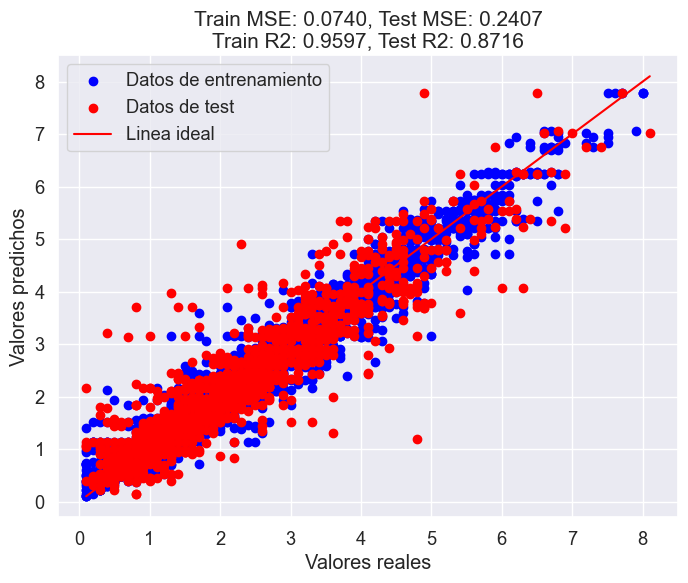

In [41]:
train_mse_Ridge = mean_squared_error(y_train, y_train_pred)
train_r2_Ridge = r2_score(y_train, y_train_pred)

test_mse_Ridge = mean_absolute_percentage_error(y_test, y_pred)
test_r2_Ridge = r2_score(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(y_train, y_train_pred, color='blue', label='Datos de entrenamiento')
ax.scatter(y_test, y_pred, color='red', label='Datos de test')
ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Linea ideal')

ax.set_xlabel('Valores reales')
ax.set_ylabel('Valores predichos')
ax.set_title(f'Train MSE: {train_mse_Ridge:.4f}, Test MSE: {test_mse_Ridge:.4f}\nTrain R2: {train_r2_Ridge:.4f}, Test R2: {test_r2_Ridge:.4f}')
ax.legend()

# Plotting
plt.show()

Se observa un sobreajuste en el entrenamiento de los datos con un 95% de acierto y cómo se puede observar en la gráfica no se localizan muchos datos atípicos alejados de la linea ideal en comparación con los datos de test, que si están presentes.

##  ¿Este modelo es mejor, peor o igual que los de regresión lineal simple y múltiple? Razona tu respuesta.

En el caso de la regresión lineal simple claramente el árbol de decisiones realiza mejores predicciones de un 39 % de aciertos a un 87% dado que el árbol de decisiones. Esto viene dado por la relación entre las características y la variable objetivo, dada su complejidad y que no se ajusta de forma lineal entre ellas, en este aspecto el árbol de decisiones se adapta mejor a esta complejidad, ya que divide las características en regiones más complejas y captura las relaciones no lineales.

En el caso de la regresión lineal múltiple muestra mejores resultados que la configuración empleada en el árbol de decisiones, esto viene dado por la capacidad de la regresión lineal múltiple dada su gama más amplia de relaciones lineales de los datos, generando un modelo más ajustado. Cómo se observa en el apartado anterior el árbol de decisiones és más sensible a los datos atípicos y tiene un sobreajuste en el entrenamiento de los datos, produciendo un rendimiento deficientes en los datos no vistos.

**Comparativa**

En base al EDA realizado, a las decisiones tomadas sobre los datos e hiperparámetros y a las características computacionales de tu equipo. ¿Qué modelo obtiene mejores resultados de regresión?

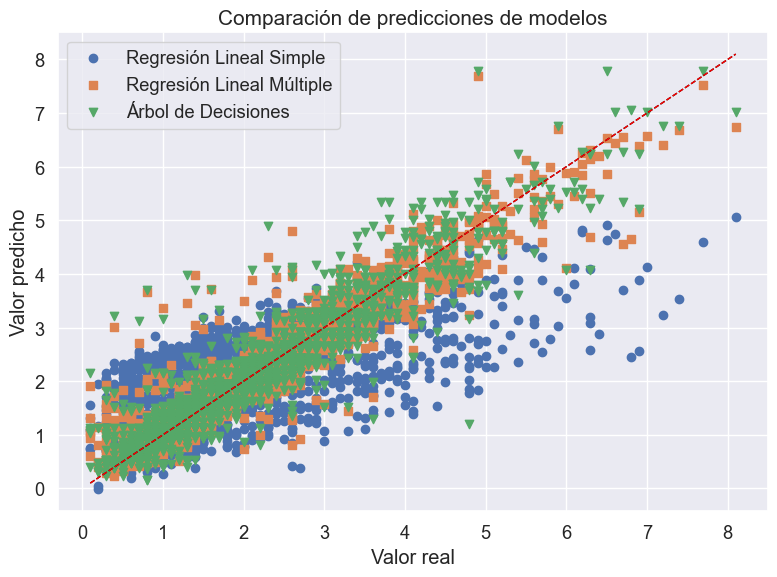

In [42]:
plt.figure(figsize=(8, 6))
plt.title("Comparación de predicciones de modelos")
plt.xlabel("Valor real")
plt.ylabel("Valor predicho")

# Graficar datos reales vs predicciones
plt.scatter(y_test_simple, y_pred_simple, label="Regresión Lineal Simple", marker='o')
plt.scatter(y_test_multi, y_pred_multi, label="Regresión Lineal Múltiple", marker='s')
plt.scatter(y_test_tree, y_pred_tree, label="Árbol de Decisiones", marker='v')

# Graficar la línea de identidad (y = x)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--', linewidth=1)

# Graficar la línea de identidad (y = x)
plt.plot([min(y_test_m), max(y_test_m)], [min(y_test_m), max(y_test_m)], color='red', linestyle='--', linewidth=1)

# Mostrar leyenda y ajustar diseño
plt.legend()
plt.tight_layout()

# Mostrar la gráfica
plt.show()

Basado en el resultado de las métricas el mejor modelo es el de <b>regresión lineal múltiple</b> y el árbol de decisiones muestra unos buenos resultados pero por debajo de la regresión lineal múltiple:
-   En el Error absoluto medio (MAE) El modelo de regresión lineal múltiple tiene un MAE más bajo (0.27) en comparación con el árbol de decisiones (0.32), lo que indica que las predicciones del modelo de regresión lineal múltiple tienden a estar más cerca de los valores reales en promedio
-   Error cuadrático medio de los logaritmos (RMSLE): El modelo de regresión lineal múltiple también tiene un RMSLE más bajo (0.14) en comparación con el árbol de decisiones (0.16), lo que sugiere que el modelo de regresión lineal múltiple tiene una mejor capacidad para manejar diferencias proporcionales en las predicciones.
-   Coeficiente de determinación (R2): El modelo de regresión lineal múltiple tiene un R2 más alto (0.90) en comparación con el árbol de decisiones (0.87), lo que indica que el modelo de regresión lineal múltiple explica una mayor proporción de la variabilidad en los datos